## Import seaborn and the mpg data.

In [8]:
import pandas as pd
import seaborn as sns
mpg = sns.load_dataset("mpg")
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## Create a visual showing the relationship between horsepower and fuel economy.

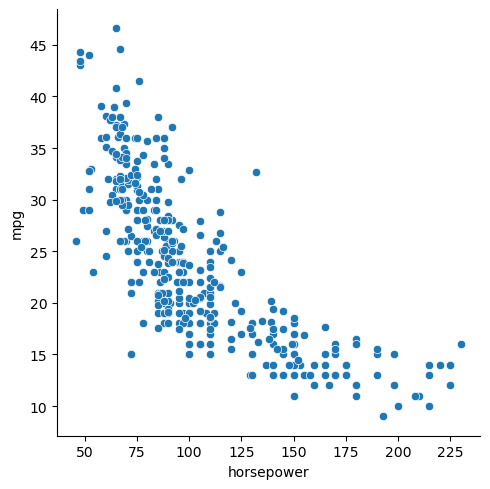

In [12]:
sns.relplot(data=mpg,x='horsepower',y='mpg')

#### Fuel economy decreases as horsepower increases, with a seemingly exponential relationship.

## Create a table summarizing fuel economy by country of origin.

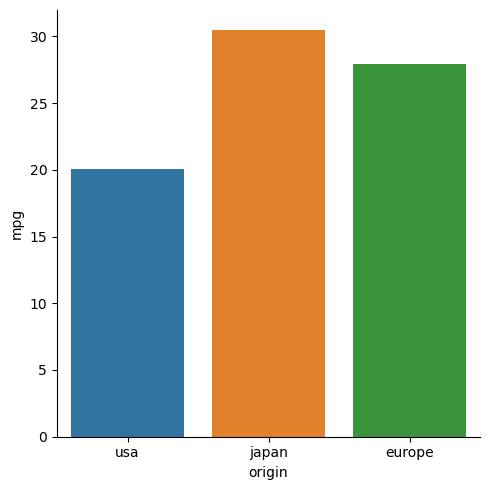

In [54]:
sns.catplot(data=mpg,x='origin',y='mpg',kind='bar',errorbar=None)

In [183]:
mpg_by_region = mpg.groupby(by='origin').mean(numeric_only=True)['mpg']
mpg_by_region_df = mpg_by_region.to_frame().reset_index()
mpg_by_region_df

,origin,mpg
0,europe,27.891429
1,japan,30.450633
2,usa,20.083534


#### When comparing the average fuel economy by country/continent, the USA has the lowest fuel economy at around 20 mpg. Due to stricter regulations overseas, Europe has an average fuel economy approaching 28 mpg and Japan has the highest average of the three at approximately 30 mpg.

## Create a visual showing how fuel economy has changed over time.

C:\Users\savan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\savan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


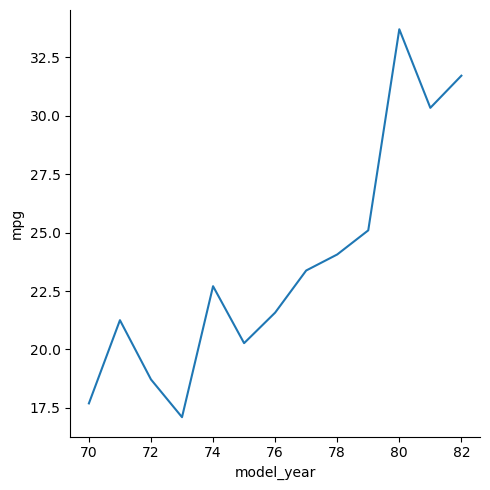

In [185]:
mpg_over_time = mpg.groupby(by='model_year').mean(numeric_only=True)['mpg']
mpg_over_time_df = mpg_over_time.to_frame().reset_index()
sns.relplot(data=mpg_over_time_df,x='model_year',y='mpg',kind='line')

#### The average fuel economy has increased a lot over time, although there is occasionally a decline year-over-year. The most substantial improvement in fuel economy occurred between 1979 and 1980. One potential factor for this change is the oil crisis that arose during this time as the Iranian revolution resulted in a decrease of crude oil production.

## Create two other visuals or tables related to fuel economy.

In [242]:
import numpy as np
mpg['brand'] = np.where(mpg.name.str.contains('chevrolet'),'chevrolet',
            np.where(mpg.name.str.contains('chevy'),'chevrolet',
            np.where(mpg.name.str.contains('ford'),'ford',
            np.where(mpg.name.str.contains('pontiac'),'pontiac',
            np.where(mpg.name.str.contains('mercury'),'mercury',
            np.where(mpg.name.str.contains('chrysler'),'chrysler',
            np.where(mpg.name.str.contains('dodge'),'dodge',
            np.where(mpg.name.str.contains('buick'),'buick',
            np.where(mpg.name.str.contains('plymouth'),'plymouth',
            np.where(mpg.name.str.contains('toyota'),'toyota',
            np.where(mpg.name.str.contains('volkswagen'),'volkswagen',
            np.where(mpg.name.str.contains('vw'),'volkswagen',
            np.where(mpg.name.str.contains('amc'),'amc',
            'other')))))))))))))
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,brand
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,buick
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,plymouth
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,amc
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,ford


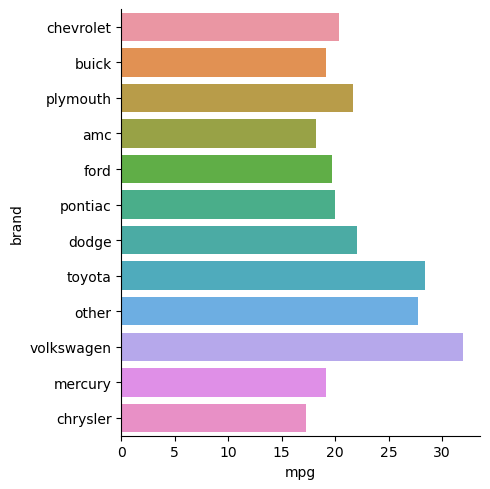

In [248]:
mpg_by_brand = mpg.groupby(by='brand').mean(numeric_only=True)['mpg'].sort_values(ascending=False)
mpg_by_brand_df = mpg_by_brand.to_frame().reset_index()
sns.catplot(data=mpg,x='mpg',y='brand',kind='bar',errorbar=None)

#### Above is the average fuel economy for a random selection of car brands included in the data. Of the brands looked at, Volkswagen has the highest fuel economy and Chrysler the lowest. However, due to some misspellings and abbreviations in the "name" field, it is possible that some entries for the listed brands ended up categorized as "other."

C:\Users\savan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\savan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


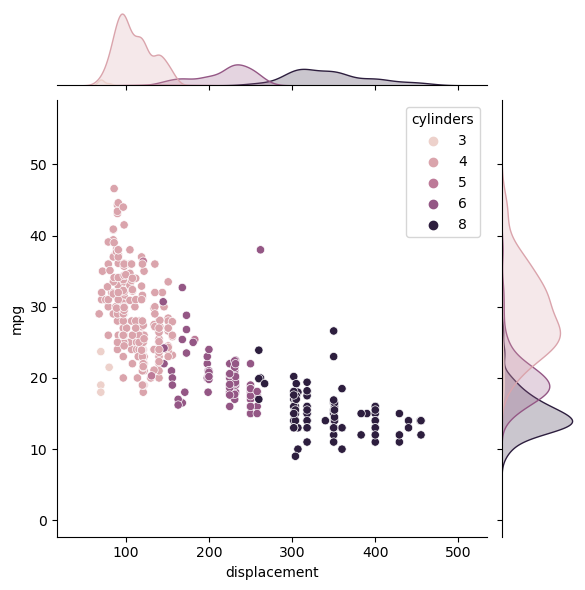

In [146]:
sns.jointplot(data=mpg,x='displacement',y='mpg',hue='cylinders')

In [130]:
mpg[(mpg['cylinders'] == 3)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
71,19.0,3,70.0,97.0,2330,13.5,72,japan,mazda rx2 coupe
111,18.0,3,70.0,90.0,2124,13.5,73,japan,maxda rx3
243,21.5,3,80.0,110.0,2720,13.5,77,japan,mazda rx-4
334,23.7,3,70.0,100.0,2420,12.5,80,japan,mazda rx-7 gs


#### Fuel economy decreases in a relatively exponential pattern as displacement increases. The exception to this is the "3 cylinder" vehicles in the list, which appear to have lower fuel economy than those with 4 cylinders. However, when looking at the data for the "3 cylinder" cars, the only ones listed are Mazda RX vehicles. These technically have rotary engines, not cylinders, and rotaries are expected to have both lower fuel economy and lower displacement compared to 4 cylinder vehicles.